In [1]:
import sys
sys.path.insert(0, '../src/')
from christofides import *
from integersolution import integer_solution
from toursvisualizer import IntToursVisualizer
from environment import Environment
import numpy as np

In [2]:
# two example distance matrices

distance_matrix0 = np.array([
   [  0.,  14.,  21.,  27.,  33.,  40.,  59.,  65.,  84.,  87.],
   [ 14.,   0.,  15.,  21.,  27.,  34.,  65.,  71.,  90.,  81.],
   [ 21.,  15.,   0.,  14.,  20.,  27.,  72.,  78.,  85.,  74.],
   [ 27.,  21.,  14.,   0.,  14.,  21.,  78.,  84.,  79.,  68.],
   [ 33.,  27.,  20.,  14.,   0.,  15.,  84.,  90.,  73.,  62.],
   [ 40.,  34.,  27.,  21.,  15.,   0.,  91.,  85.,  66.,  55.],
   [ 59.,  65.,  72.,  78.,  84.,  91.,   0.,  14.,  33.,  46.],
   [ 65.,  71.,  78.,  84.,  90.,  85.,  14.,   0.,  27.,  40.],
   [ 84.,  90.,  85.,  79.,  73.,  66.,  33.,  27.,   0.,  21.],
   [ 87.,  81.,  74.,  68.,  62.,  55.,  46.,  40.,  21.,   0.]])

distance_matrix1 = np.array([
   [ 0.,  11.,  84.,  43.,  61.,  33.],
   [11.,   0.,  91.,  98.,  66.,  27.],
   [84.,  91.,   0.,  14.,  33.,  46.],
   [43.,  98.,  14.,   0.,  8.,  40.],
   [61.,  66.,  33.,  8.,   0.,  56.],
   [33.,  27.,  46.,  40.,  56.,   0.]])

In [3]:
# Create the environment structure

matrices = [distance_matrix0, distance_matrix1]
modules_sequence = [0,0,1,1] # the first two modules are of type 0, the other two are of type 1
distances = [10,30,10] # from 0 to 1 there's a distance 10. From 1 to 2 there's a distance 30. From 2 to 3 there's 10.

In [4]:
env = Environment(matrices, modules_sequence, distances)
m = 3  # number of robots

In [5]:
tours = integer_solution(env, m)

In [6]:
vis = IntToursVisualizer(tours, env)

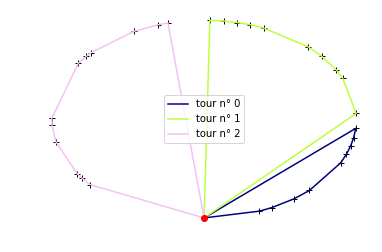

In [7]:
vis.draw()

In [8]:
def print_tours(tours):
    for i,tour in enumerate(tours):
        print("Tour", i, "with length", env.get_tour_length(tour), ":", tour)
        
print("The tours ")
print_tours(tours)

The tours 
Tour 0 with length 248.0 : [0, 6, 7, 8, 9, 5, 4, 3, 2, 1, 0]
Tour 1 with length 268.0 : [0, 10, 16, 17, 18, 19, 15, 14, 13, 12, 11, 0]
Tour 2 with length 500.0 : [0, 20, 21, 25, 24, 23, 22, 26, 27, 31, 30, 29, 28, 0]


# Explanation

The robot that covers the last two modules travels much more than the other.  
Why should this be the best solution? By definition, because all others combination are worse.

A robot that covers module 1 and 2 together takes: 516  
A robot that covers module 2 and 3 together takes: 528  
A robot that covers module 3 and 4 together takes: 500

We have three robots and 4 modules, we need at least one robot to explore more than module. As shown, it is better to group module (3 and 4) rather than (1 and 2) or (2 and 3)
